In [105]:
import pandas as pd

df = pd.read_csv('./Data/chess_numeric.csv')

In [106]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ["black_elo", "eco"]]
y = df.loc[:, "result"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)

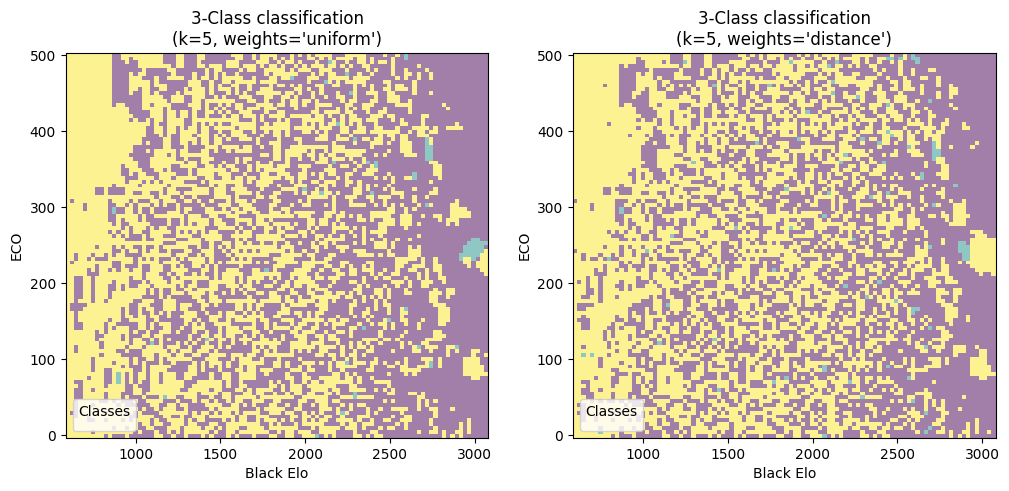

In [111]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Black Elo",
        ylabel="ECO",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )

    disp.ax_.legend(
        ["Draw", "White wins", "Black wins"],
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()